<a href="https://colab.research.google.com/github/ronyahammad/Climacell-weather-widget/blob/master/Copy_of_hw1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1.2: Plotting an elephant (35 pts)

In this problem, we will practice skills with manipulating Numpy arrays and making plots with a fun example.

**a)** Read [this little gem of an article](https://doi.org/10.1038/427297a). It has a good lesson, but it is important to note, as you will learn if you take part (b) of this course, a model is not automatically invalid because it has a lot of parameters. More important is what the parameters are and to what physical quantities they relate. Nonetheless, it is often desirable to have simpler models for many reasons, including interpretability.

**b)** Based on the anecdote about John von Neumann, [Mayer, Khairy, and Howard](https://doi.org/10.1119/1.3254017) worked out a scheme to draw an elephant with four complex parameters. The complex parameters are

\begin{align}
&p_1 = -60 - 12 i,\\[1em]
&p_2 = -30 + 14 i,\\[1em]
&p_3 = 8 - 50 i,\\[1em]
&p_4 = -10 - 18 i.
\end{align}

For notational ease, let $r_j$ be the real part of parameter $j$ and $i_j$ by the imaginary part of parameter $j$. For example, $r_1 = -60$ and $i_3 = -50$.

Using these parameters, Mayer, Khairy, and Howard worked out a parametric curve for the shape of an elephant based on a truncated Fourier series. You can write the $x$ and $y$ values of a smooth parametric curve as a Fourier series as

\begin{align}
x(t) = A_{0,x} + \sum_{k = 1}^\infty A_{k,x} \cos kt + \sum_{k = 1}^\infty B_{k,x} \sin kt, \\[1em]
y(t) = A_{0,y} + \sum_{k = 1}^\infty A_{k,y} \cos kt + \sum_{k = 1}^\infty B_{k,y} \sin kt,
\end{align}

where $t$ ranges from zero to $2\pi$. The Mayer, Khairy, and Howard worked out that you can get an elephant using

\begin{align}
&A_{1,x} = r_1,\;B_{1,x} = r_2, \; B_{2,x} = r_3, \; B_{3,x} = r_4,\\[1em]
&A_{3,y} = i_1,\;A_{5,y} = i_2, \; B_{1,y} = i_3, \; B_{2,y} = i_4,
\end{align}

with all other Fourier coefficients being zero.

Compute a smooth curve for an elephant using this formula and plot it. (This problem is not meant to teach you about Fourier series, but rather to practice creating and manipulating Numpy arrays and making plots.)

**c)** For fun, you can make a little scene for your elephant by adding other glyphs to the plot. You can read Bokeh's documentation to learn about what you can do. You may wish to investigate patches and box annotations, among others. (This part of the problem is not graded.)


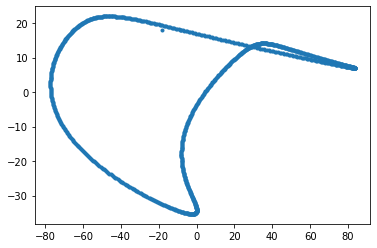

In [11]:

from matplotlib import animation
import matplotlib.pyplot as plt
from numpy import append, cos,  linspace, pi, sin, zeros


p = [ -60 - 12j,
      -30 + 14j,
      8 - 50j,
     10 - 18j] 

def fourier(t, A):
    f = zeros(t.shape) 
    for k in range(len(A)):
        f += A.real[k]*cos(k*t) + A.imag[k]*sin(k*t)
    return f

def elephant(t, p):
    npar = 5
    Ax = zeros((npar,), dtype='complex')
    Ay = zeros((npar,), dtype='complex')

    Ax[1] = p[0].real*1j
    Ay[1] = p[3].imag + p[0].imag*1j

    Ax[2] = p[1].real*1j
    Ay[2] = p[1].imag*1j


    Ax[4] = p[2].real


    x =  append(fourier(t,Ay), [p[3].imag])
    y = -append(fourier(t,Ax), [-p[3].imag])

    return x,y

x,y=elephant(linspace(0,2*pi,1000),p)
plt.plot(y,-x,'.')
plt.show()

<br />